# Datasets
- [Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)
- [Allegheny Country Crash Data](https://data.wprdc.org/dataset/allegheny-county-crash-data)

## Overview

Traffic counters are used to determine the speed of each car passing by the counter on the road. This data contains that information for most areas of
Pittsburgh.

# Metrics

One metric I plan to use **percent over the limit**, that is, the % of cars above the speed limit. This will be an important metric determining safety of an area.
Another metric can be, **average speed exceeding the limit**,  that is, when people speed, on average how much higher than the normal speed limit do drivers go.

In [11]:
import os
import pandas as pd

# All the CSV files live in the data folder.
DATA_DIR = "data/"

# Automatically load every CSV file in the DATA_DIR into a dictionary.
# The return result is a dict where they keys are the filename without the
# extension, and the values are `DataFrame`s.
def load_all_csv():
    return {f.split(".")[0] : pd.read_csv(DATA_DIR + f) for f in os.listdir(DATA_DIR) if f.split(".")[1] == "csv"}

# Load all the CSV datasets at once.
datasets = load_all_csv()

/Users/aaronsutton/.anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (77,78,79,80,81,82,83,84,183,189) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


With the code above, all you need to do is drop the relevant CSV into `data/` and it will be loaded
automatically. Dataset access can now be done using the dataset dictionary.

For example, if I wanted to get the crash dataset:
```python
datasets["crash"]
```
Or if you added `covid.csv` to `data/`:
```python
datasets["covid"]
```

If we need formats other than CSV, we can either modify the function or just load the file(s) directly.

# Analysis

## Average Median Speed by Neighborhood

First, we'll aggregate the speed count data to form an approximate average speed for every recorded neighborhood in Pittsburgh.

<AxesSubplot:xlabel='neighborhood'>

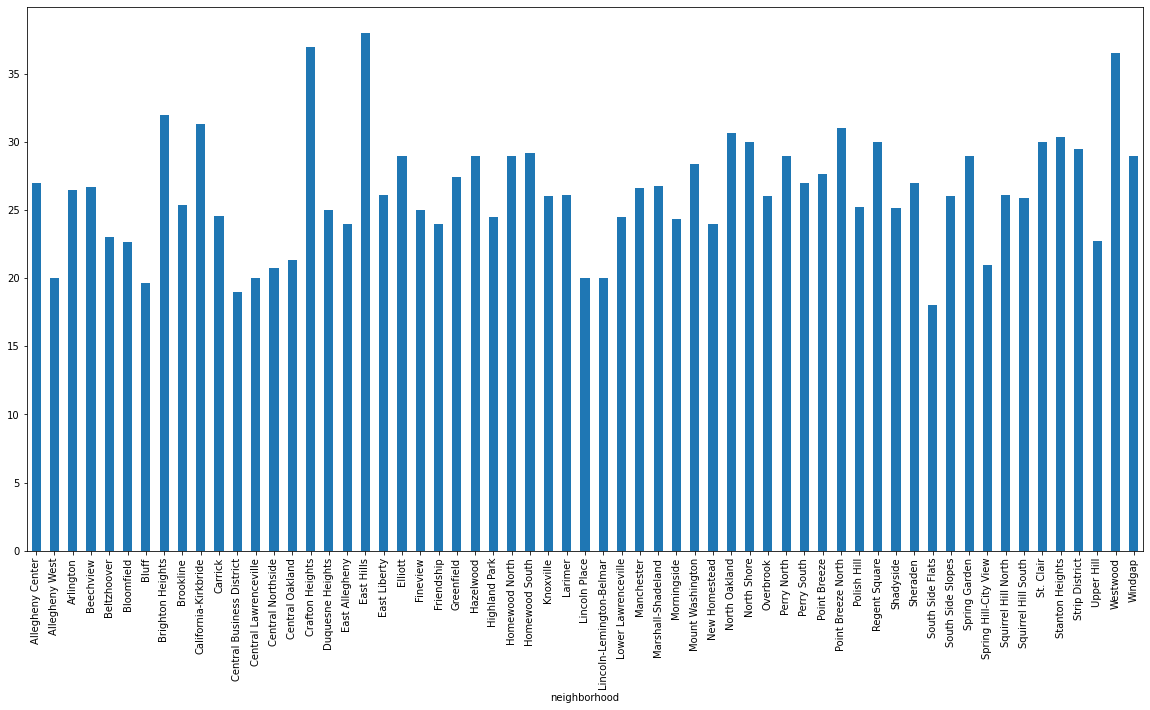

In [12]:
df = datasets["traffic"]
(df.groupby(['neighborhood', 'median_speed'], as_index=False).mean().groupby('neighborhood')['median_speed'].mean()).plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='neighborhood'>

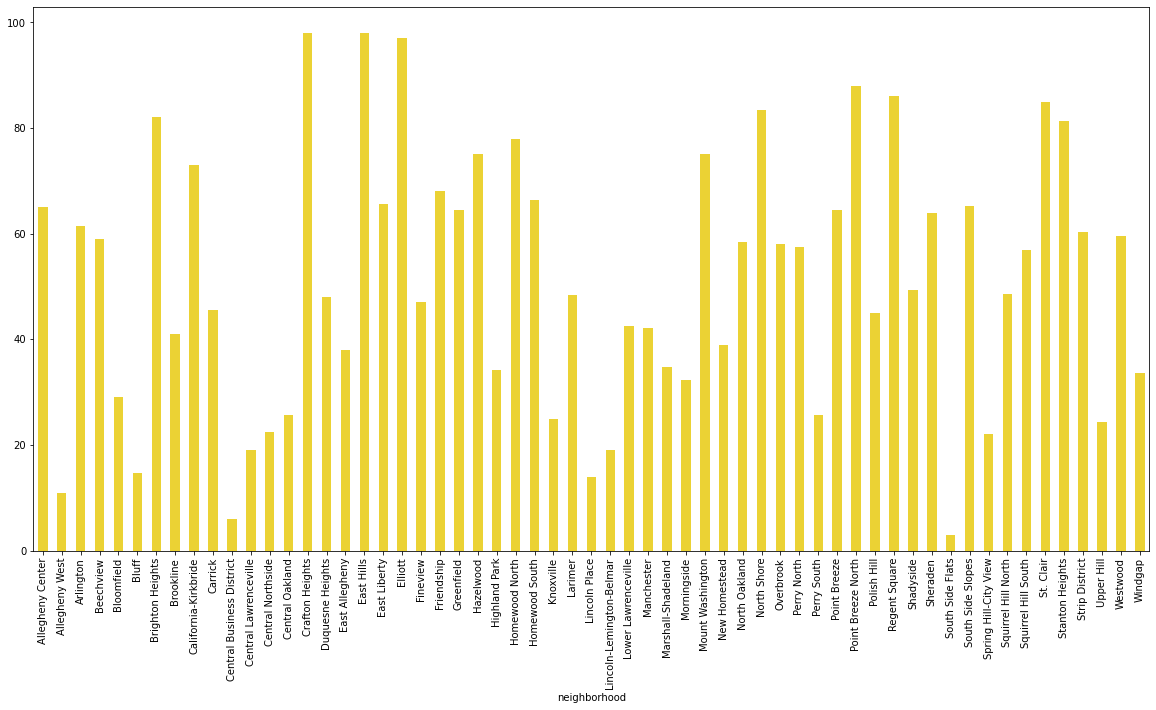

In [15]:
df = datasets["traffic"]
(df.groupby(['neighborhood', 'percent_over_limit'], as_index=False).mean().groupby('neighborhood')['percent_over_limit'].mean()).plot.bar(color="#ebd234", figsize=(20,10))


<AxesSubplot:xlabel='neighborhood'>

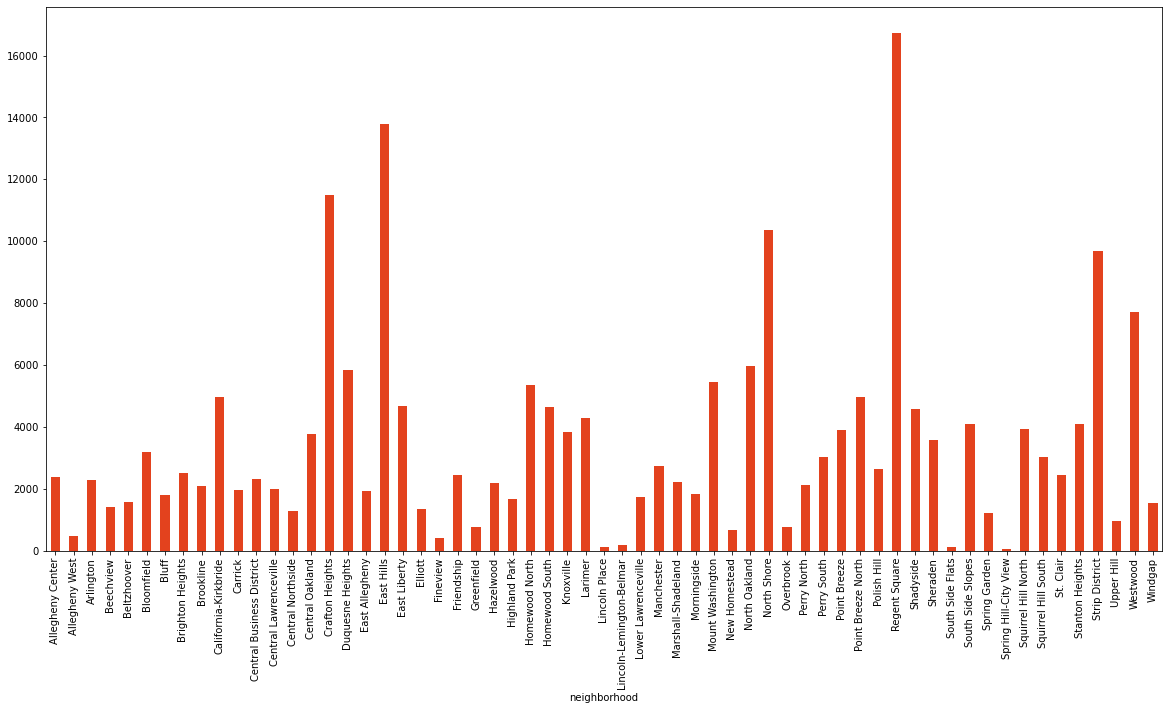

In [16]:
df = datasets["traffic"]
(df.groupby(['neighborhood', 'average_daily_car_traffic'], as_index=False).mean().groupby('neighborhood')['average_daily_car_traffic'].mean()).plot.bar(color="#e3421e", figsize=(20,10))

# Median Age at death (2011-2015)
- The median age of death properly represents the quality of a neighboorhood because quality of life drastically decreases after death, so the longer one is expected to live, the better quality life they have. 
## Data
- The median age at death is calculated for each municipality in Allegheny County. Data is based on the decedent's residence at the time of death, not the location where the death occurred. Median age by municipality is based on “official” death records that have been released by the Pennsylvania Department of Health. Data is broken out by race (white/black), and also includes a count of deaths for City of Pittsburgh neighborhoods and Allegheny County Municipalities.


## Metric
- This dataset presents the total number of black, white, and combined deaths, as well as the median age of blacks, whites, and combined at death. Each of these categories is designated to the individual neighborhoods of Pittsburgh. The data plotted in the graphs is the median age at death.

- <https://data.wprdc.org/dataset/median-age-death> data retrieved: 15 April, 2021

### The Best neighborhood Analysis


In [3]:
#import all libraries needed
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='neighborhood'>

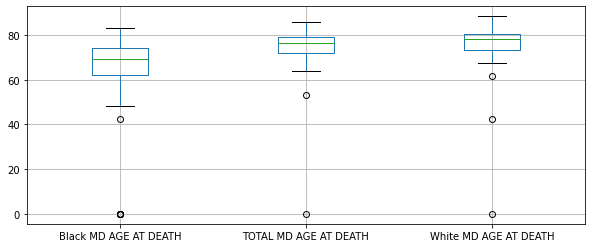

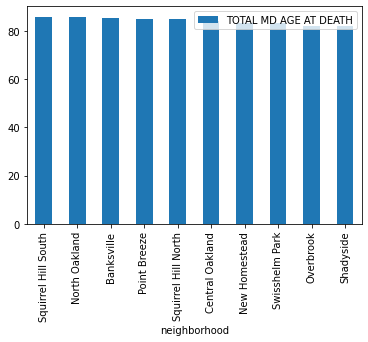

In [14]:
#read in data and 
df = pd.read_csv("data/nhoodmedianage20112015.csv")
exclude = ['BLACKdeaths', 'WHITEdeaths', 'TOTALdeaths*']
df.loc[:, df.columns.difference(exclude)].boxplot(figsize = (10,4))
df.nlargest(10, ['TOTAL MD AGE AT DEATH']).set_index('neighborhood').plot.bar(y='TOTAL MD AGE AT DEATH')

In [7]:
age = pd.read_csv('data/nhoodmedianage20112015.csv')
md_age = age.groupby("neighborhood").sum()['TOTAL MD AGE AT DEATH']
md_age.sort_values(ascending=False)

neighborhood
Squirrel Hill South    85.9
North Oakland          85.6
Banksville             85.5
Point Breeze           85.1
Squirrel Hill North    85.0
                       ... 
Allegheny West         65.0
Arlington Heights      63.7
Fairywood              53.3
South Shore             0.0
Chateau                 0.0
Name: TOTAL MD AGE AT DEATH, Length: 90, dtype: float64

In [12]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

<AxesSubplot:>

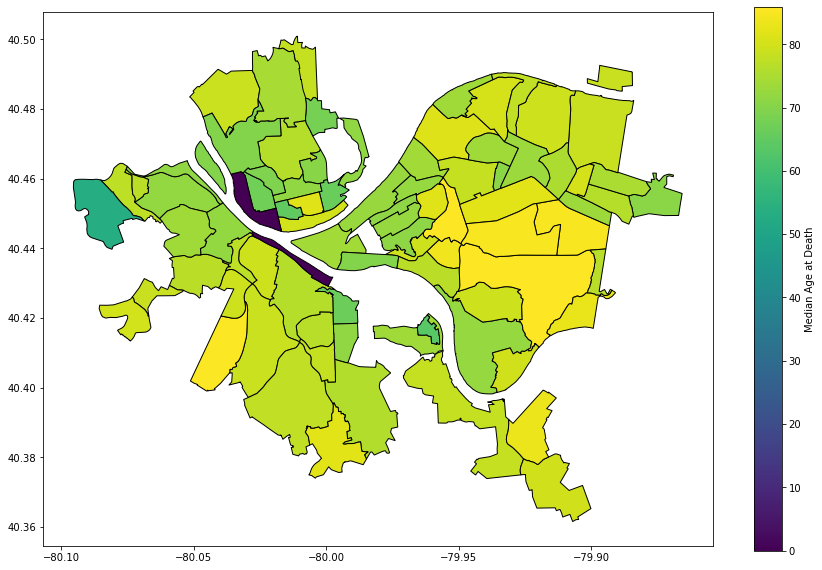

In [11]:
steps_map = neighborhoods.merge(md_age, how='left', left_on='hood', right_on='neighborhood')
steps_map[['hood','TOTAL MD AGE AT DEATH','geometry']].head()
steps_map.plot(column = 'TOTAL MD AGE AT DEATH', figsize = (15,10), edgecolor = "black", legend = True, legend_kwds = {'label': "Median Age at Death"})

# Conclusion
As shown by the graphs and map, The neighborhood with the highest average age at death is Squirrel hill south. The top results had very little deviation, so if youre looking to live a long time, its best to consider those neighborhoods.


# Quantifying Fire Safety through incidents reported by the Pittsburgh Bureau of Fire
#### Section by Diego Jurado
## Section 1: Metric Introduction
The investigation presents the opportunity to quantify "What a good a neighborhood is" and ultimately determine which is the best. I understood this to be which neighborhood is the most "family-friendly" and to me when considering where to raise a family safety is the main concern. The metrics I was considering to use were between burglary incidents and fire incidents to determine safety in neighborhoods. The deciding factor bewteen the two was that burglarly, besides quantity of burglary incidents, are much harder to quantify, while fire incidents have two safety factors that familys consider which are the rate at which incidents occur, and the average fire department response time. Consequently, my section of the investigation will seek to quantify these factors and rank the neighborhoods accordingly.
## Section 2: Python Extension Imports
Before we begin to manipulate any data we must import the appropriate libraries
#### The following code:
- Imports the `pandas` library
- Imports the `requests` library

In [230]:
import pandas as pd
import requests

## Section 3: Importing Data Tables
The dataset will be imported from the Western Pennsylvania Regional Data Center. The data within the file, `fire.csv` is the dataset that will be used to quanitfy the metric of fire safety throughout this section of the investigation. The dataset holds information regarding incidents of fire responded to by the Pittsburgh Bureau of Fire. Additionally, the dataset can be accessed online here: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02?view_id=db1ccf7c-fab0-4d5c-af3e-245ebe766be2 Moreover, the data within the file `stations.csv` is the dataset that will be used to calculate the average response time from station to incident based on neighborhood. The `stations.csv` dataset was created based off of information found online.

#### The following code:
- Imports `fire.csv` and `stations.csv`.
- Creates the `fire_raw` DataFrame and the `stations_raw` DataFrame.
- Formats the raw DataFrames into usable verisons by dropping unnecessary data.
- Creates the `fire` DataFrame and the `stations` DataFrame.
- Clears the `fire` DataFrame of any data that does not match the `stations` DataFrame.



In [231]:
# importing csv files and creating raw DataFrames
stations_raw = pd.read_csv("stations.csv").drop(columns=['station'])
fire_raw = (pd.read_csv("fire.csv")
        # drop unnecessary columns to investigation
       .drop(columns=['call_no','alarm_time','alarms', 'primary_unit', 
                      'census_tract', 'council_district', 'ward', 'tract', 
                      'public_works_division', 'pli_division', 'police_zone', 'address'])
       # drop any rows that contain any missing data
        .dropna()
        .drop_duplicates()
       .reset_index()
       .drop(columns='index'))

# creating fire and stations DataFrames
fire = fire_raw[['neighborhood', 'incident_type', 'type_description', 'fire_zone', 'latitude', 'longitude']]
stations = stations_raw[['neighborhood', 'station_no']]

# clearing the fire DataFrame of any non-matching data
fire = (fire.loc[fire.neighborhood.isin(stations.neighborhood),].reset_index().drop(columns='index'))

## Section 4: Quantifying Total Incidents per Neighborhood
After creating the DataFrames we can now move on to quantifying the first metric, Total Incident Quantity per Neighborhood. 

#### The following code:
- Creates a list, `neighborhood_list`.
- Creates a dictionary to count how many incidents occured per neighborhood.
- Creates a sorted version of the neighborhood list
- Creates a DataFrame, `incidents`, to store the dictionary.
- Displays the DataFrame as a bar graph

In [241]:
# Creating a list to store neighborhoods
neighborhood_list = []

for index, row in fire.iterrows():
    if row['neighborhood']not in neighborhood_list:
        neighborhood_list.append(row['neighborhood'])
        
# Creating a dictionary to store quantity of incidents
dict = {}
type(dict)
for index, row in fire.iterrows():
    if row['neighborhood'] not in dict:
        dict[row['neighborhood']] = 1
    else:
        dict[row['neighborhood']] += 1

# Creating a sorted version of the neighborhood list
index = sorted(neighborhood_list)

# Storing dictionary in a DataFrame
incidents = pd.DataFrame({'incidents_no': dict}, index=index)

### Figure 1: Bar Graph of Incident Quantity per Neighborhood

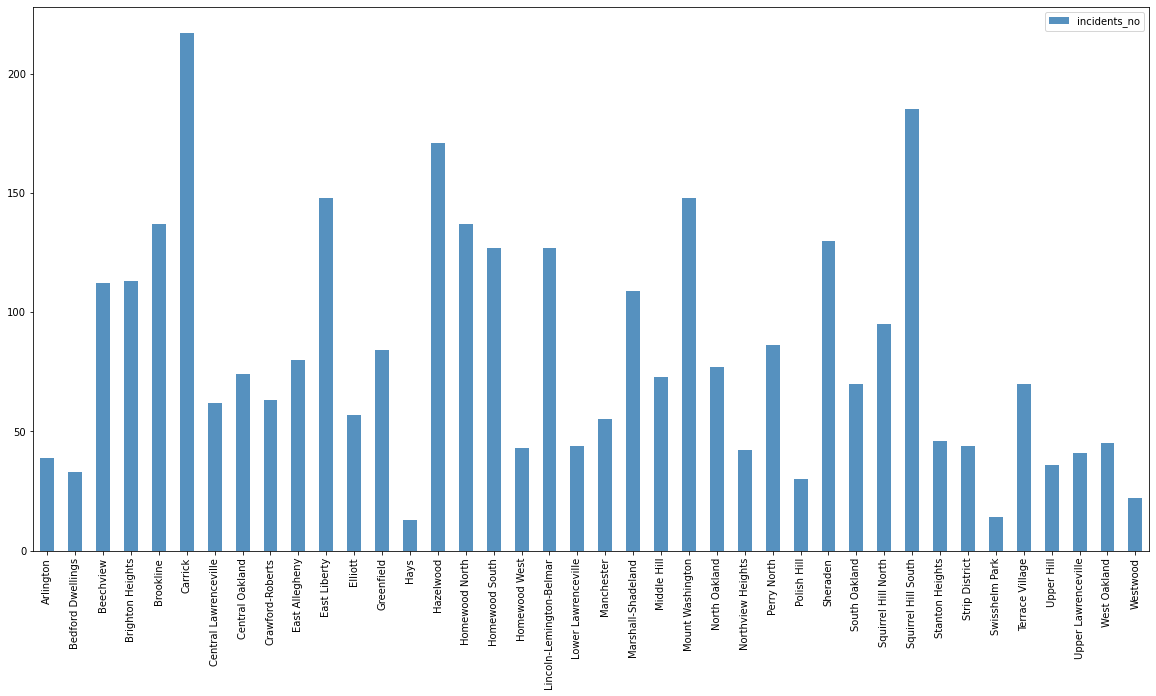

In [240]:
# Displaying the DataFrame as a Bar Graph
dx = incidents.plot.bar(rot=90, color="#5691BF", figsize=(20,10))

The bar graph displays each neighborhood and their total incident quantity. With this metric alone one could determine that the neighborhoods of Hays, Swisshelm Park, and Westwood would be the safest in regard to fire safety, while the neighborhoods of Carrick, Hazelwood, and Squirrel Hill South would be the most unsafe in regard to fire safety.
## Section 5: Utilizing Google Distance Matrix API
After quantifying the first metric, we move on to quantifying the second, which is calculating the average response time of the fire department per neighborhood. My thought processs was straightforward with this. I decided I would have to calculate the time between the station and incident location per incident and then classify it per neighborhood. However, the code was a bit more complex. I determined that the first step would be calculating the time between station and incident, which was facilitated by the Google Distance Matirx API. I had no experience with this and it was quite fun to employ. 

#### The following code:
- Creates a list, `response_time`.
- Opens the `api-key.txt` file, which contains the API key.
- Establishes a URL to access the Distance Matrix API.
- Accesses the Distance Matrix API for each incident.
- Stores the Distance Matrix API resulting time.
- Constructs a new column for the `fire` DataFrame titled `response_time` to store the `response_time` list.
- Prints a statement when it's finished running

In [233]:
# Creating a list to store response time
response_time = []

# API Key
api_file = open("api-key.txt","r")
api_key = api_file.read()
api_file.close()

# base URL
url = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&"

# accessing the API
for j, row in fire.iterrows():
    inc_nbr = row['neighborhood']
    destination = str(row['latitude']) + ", " + str(row['longitude']) 
    for k, row in stations.iterrows():
        stn_nbr = row['neighborhood']
        station_no = row['station_no']
        if inc_nbr == stn_nbr:
            origin = "Pittsburgh Fire Station " + str(station_no)
            
            # getting response from API
            r = requests.get(url + "origins=" + origin + "&destinations=" + destination + "&key=" + api_key)     
            seconds = r.json()["rows"][0]["elements"][0]["duration"]["value"]
            
            # storing the resulting time
            response_time.append(seconds)

# Constructing a new column for response time per incident
fire['response_time'] = response_time

# Printing indication that the code has finished running
print('This section has finished running.')

This section has finished running.


## Section 6: Creating a secondary dataframe with calculated values
After quantifying both metrics it is time to consolidate the data into one new DataFrame that will allow us to rank the best neighborhoods in Pittsburgh in regard to fire safety.

#### The following code:
- Creates a second dictionary for storing response time per neighborhood
- Creates a DataFrame for the calculated values
- Appends both dictionaries to the new DataFrame 

In [234]:
# Creating a second dictionary that stores total response time per neighborhood
dict2 = {}
type(dict2)
for index, row in fire.iterrows():
    if row['neighborhood'] not in dict2:
        dict2[row['neighborhood']] = row['response_time']
    else:
        dict2[row['neighborhood']] += row['response_time']

# Creating a second DataFrame with the calculated values
columns = ['neighborhood', 'incidents_no', 'avg_resp_time']
fire_pro = pd.DataFrame(columns=columns)

# Appending values to the new DataFrame
for x in neighborhood_list:
    avg_resp_time = (dict2[x]/dict[x])
    fire_pro = fire_pro.append({'neighborhood' : x , 'incidents_no' : dict[x], 'avg_resp_time' : avg_resp_time }, ignore_index = True) 

## Section 7: Graphing Data
### Creating lists to form DataFrames for graphing
Now that all the data needed has been calculated we can now move towards visualizing and arriving at our conclusion and consequently ranking. First we must create lists of data to then create specific sets for graphing purposes as there will be several bar graphs drawn for comparison purposes.
#### The following code:
- Initializes 3 new lists: incidents_no, avg_resp_time, and index
- Appends all 3 list with the appropriate data
- Displays a bar graph of average response time per incident per neighborhood
- Displays a bar graph of incident quantity per neighborhood
- Displays a bar graph of both average response time and incident quantity per neighborhood
- Displays a scatter plot of showing the relation between neighborhoods in regard to response time and incident quantity

In [235]:
incidents_no = []
avg_resp_time = []
index = []

for x, row in fire_pro.iterrows():
    incidents_no.append(row['incidents_no'])
    avg_resp_time.append(row['avg_resp_time'])
    index.append(row['neighborhood'])
    

### Figure 2: Bar Graph of Average Response Time per Incident per Neighborhood

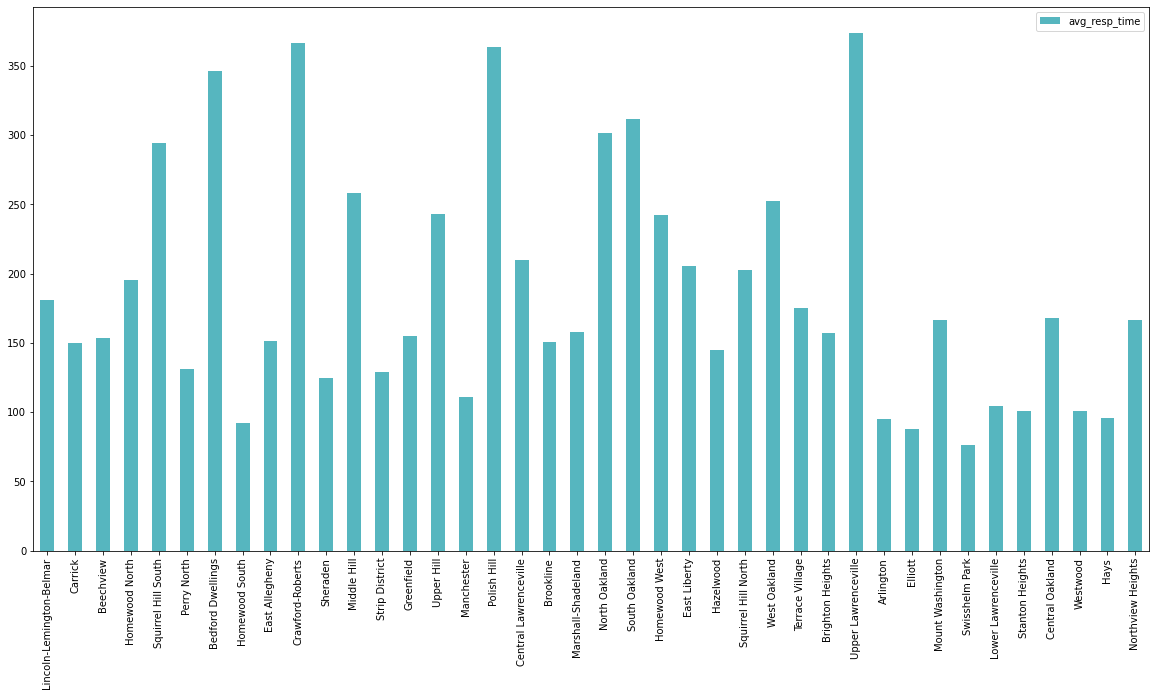

In [236]:
response_time=pd.DataFrame({ 'avg_resp_time': avg_resp_time}, index=index).plot.bar(rot=90,color="#56B6BF",figsize=(20,10))

### Figure 3: Bar Graph of Incident Quantity per Neighborhood

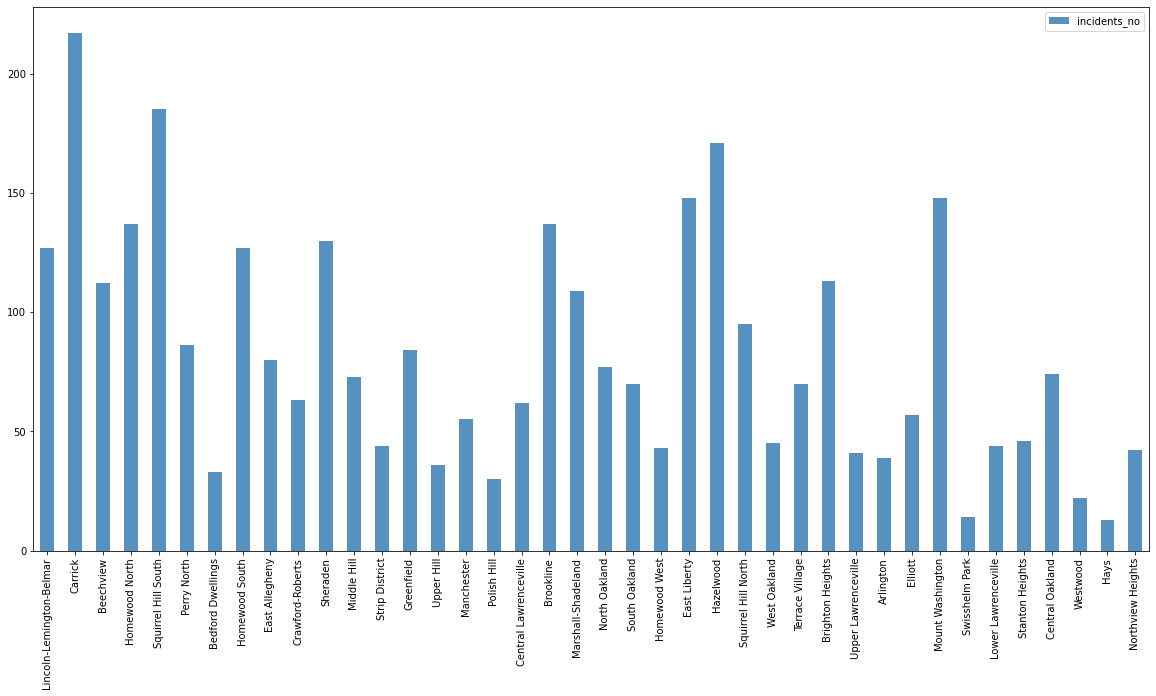

In [237]:
incident_quantity = pd.DataFrame({ 'incidents_no': incidents_no}, index=index).plot.bar(rot=90,color="#5691BF",figsize=(20,10))

### Figure 4: Bar Graph of both Average Response Time and Incident Quantity per Neighborhood

<AxesSubplot:>

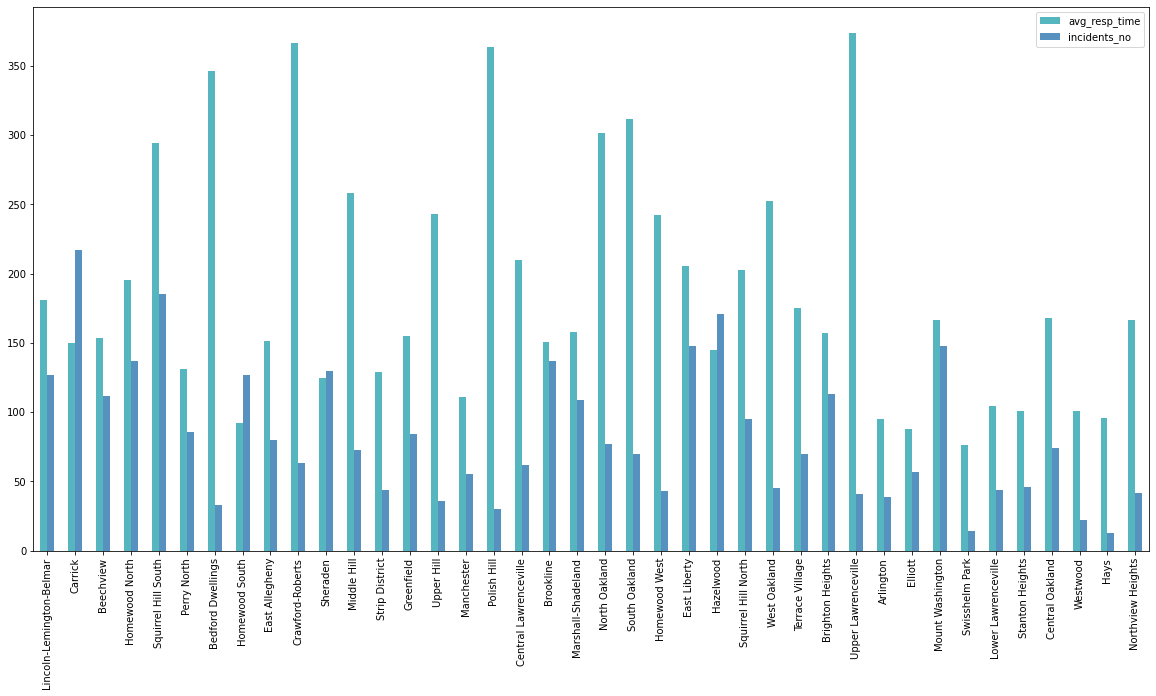

In [238]:
quantity_to_response = pd.DataFrame({'avg_resp_time': avg_resp_time, 'incidents_no': incidents_no}, index=index)
quantity_to_response.plot.bar(rot=90,color=["#56B6BF","#5691BF"], figsize=(20,10))

### Figure 5: Scatter Plot Graph Showing relation between neighborhoods in regard to Response Time and Incident Quantity

<AxesSubplot:xlabel='incidents_no', ylabel='avg_resp_time'>

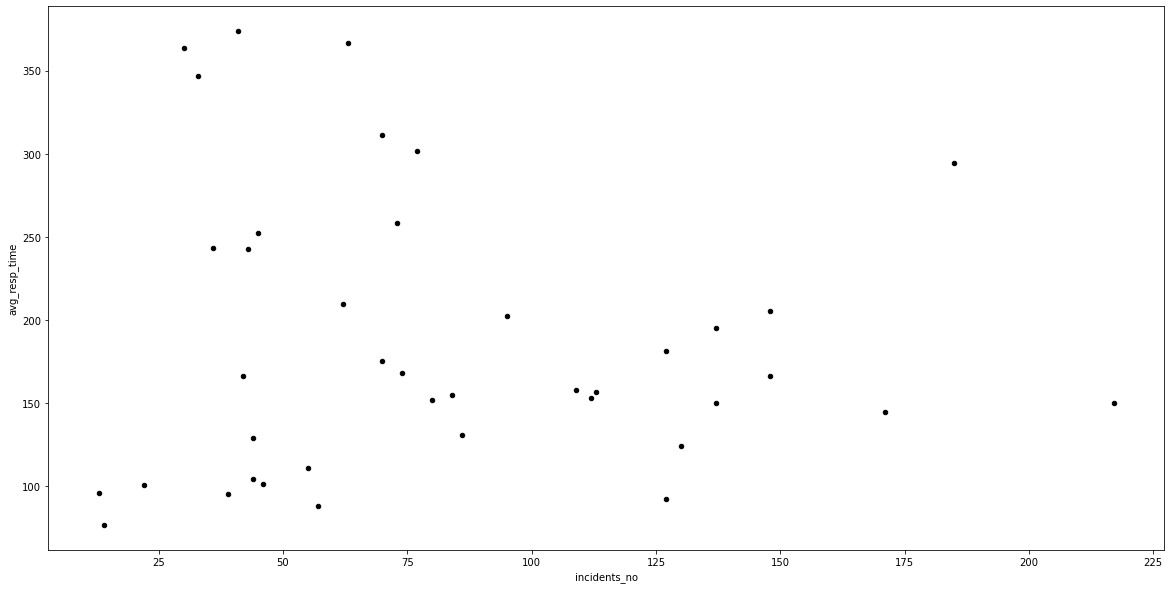

In [239]:
quantity_to_response.plot.scatter(x='incidents_no',y='avg_resp_time',color="#000000",figsize=(20,10))

## Section 8: Metric Conclusion
The scatter plot graph, figure 5, is the best for determining the overall metric rating, as the less distance there is between the origin and the point the higher the rank of the neighborhood is. In short, the top three neighborhoods are Manchester, Hays, and Swissshelm Park, with Swisshelm Park being the best for fire safety. However, it should be noted that these three have potential error in regard to average response time as they are limited in the quantity of incidents that have occured, and consequently have a smaller basis form response times to be calculated. Moreover, if one cares about one metric more than the other for example preferring average response time over incident number the top five choices would be Swisshelm Park, Arlington, Homewood South, Hays and Elliott. On the other hand, if one were to care more about the number of incidents, the top 5 would be Swisshelm Park, Westwood, Hays, Bedford Dwellings, and Polish Hill.